In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

#import tensorflow and keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import layers

# Neural Network - Fashion MNIST
Name: Fuqiang (Jack) Tan
The purpose of this project is to create a training model utilizing neural network to recognize a fashion dataset.

## Data wrangling and visualization

### Load dataset and preview data

We will utilize 70,0000 28x28p MNIST fashion images to train a neural network to recognize 10 fashion items, on a gray scale of 1 to 255.

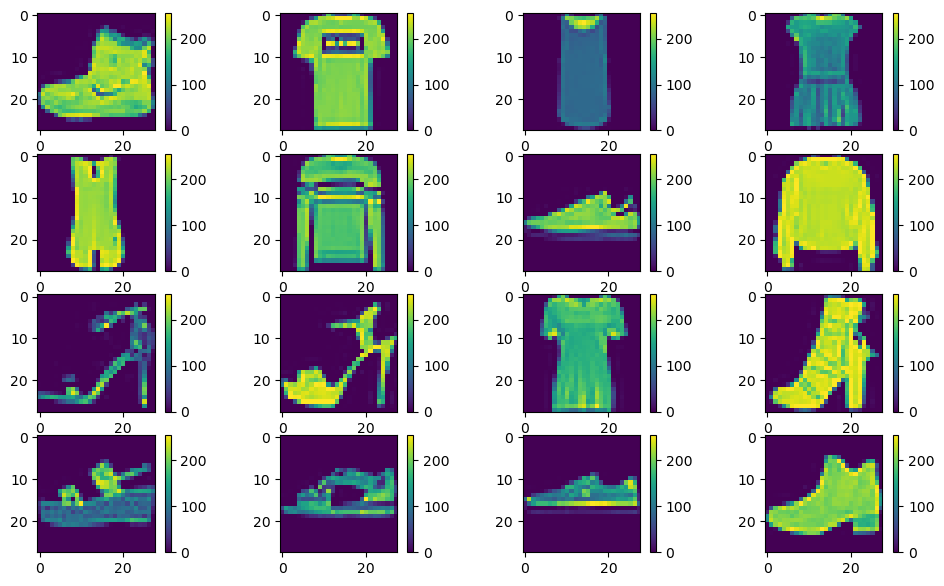

In [2]:
#load MNIST dataset in form of arrays, default 60k train 10ktest
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#visualize data
plt.figure(figsize=(12,7))  #create new figure object and set size
for i in range(16):
    plt.subplot(4,4,i+1) #4x4 images
    plt.imshow(train_images[i],cmap='viridis') #apply viridis color map to samples
    plt.colorbar()
    
plt.show()

List of item names:

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Check integrity of the dataset

Train image check:

In [4]:
# number of images in train set
print('Number of images:',len(train_images))

#type of data
print('Type:', type(train_images))

#shape of data, 28x28p
print('Shape:', train_images[0].shape)

#max and min values of the training images
print('Image value range:', (np.min(train_images), np.max(train_images)))

Number of images: 60000
Type: <class 'numpy.ndarray'>
Shape: (28, 28)
Image value range: (0, 255)


Train label check:

In [5]:
#number of labels in train set
print('Number of labels:', len(train_labels))

#shape of the labels, 60000
print('Shape:', train_labels.shape)

#categories of the labels
print('Set of label values:', set(train_labels))

Number of labels: 60000
Shape: (60000,)
Set of label values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Test image check:

In [8]:
# number of images in train set
print('Number of images:',len(test_images))

#type of data
print('Type:', type(test_images))

#shape of data, 28x28p
print('Shape:', test_images[0].shape)

#max and min values of the training images
print('Image value range:', (np.min(test_images), np.max(test_images)))

Number of images: 10000
Type: <class 'numpy.ndarray'>
Shape: (28, 28)
Image value range: (0, 255)


Test label check:

In [9]:
#number of labels in train set
print('Number of labels:', len(test_labels))

#shape of the labels, 10000
print('Shape:', test_labels.shape)

#categories of the labels
print('Set of label values:', set(test_labels))

Number of labels: 10000
Shape: (10000,)
Set of label values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Transform the image arrays into 1 and 0s from 0-255, by dividing by its max gray scale value

In [10]:
train_images = train_images / 255
test_images = test_images / 255

Sanity check 
Visualize tranformed images with item labels

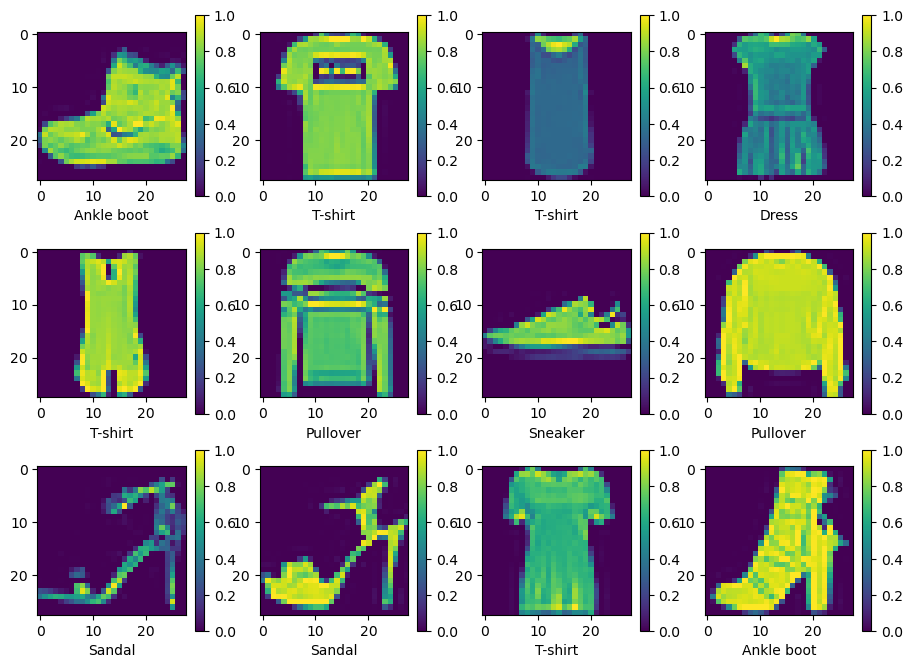

In [11]:
plt.figure(figsize=(11,8)) #create new figure object and set size
for i in range(12):
    plt.subplot(3,4,i+1) #4x4 images
    plt.imshow(train_images[i],cmap='viridis') #apply viridis color map to samples
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Data Analysis and Inference

### Build the Neural Network
Build the model and configure hidden layers of the network.

First layer of the neural net reformats the images from a 2D array(28 pixels *28 pixels) to a 1D array(28*28= 784 pixels). It unstacks the organized 28 * 28 pixels into a single vector.

The hidden# and output layers creates a dense neural net that interconnects the previous and following layer of nods. We set 128 nodes in the first layer and relu as an activation function. Since the output variable comprise of 10 catigories, we set 10 units, and use softmax as an activation function to get estimates of probabilities for each of the 10 categories of our output variable.

To compile the model, we used gradient decent methods, rmsprop(root mean sqr propagation) or adam(adaptive moment estimation) as optimizers. Respectively, RMSProp uses the second moment by with a decay rate to speed up from AdaGrad. Adam uses both first and second moments, and is generally the best choice.

We used loss function to measure performance, loss=sparse_categorical entropy, similar to categorical_entropy:

$$-{1\over N} \sum_{i=1}^N\sum_{j=0}^{9}1_{\{y_i=j\}}\ln\hat{\pi}_j(x_i)$$

The difference between loss=categorical_entropy and loss=sparse_categorical_entropy is in the format of $y_i$'s that was used for categorical output $Y$. If $y_i$'s are (ex. 3-class classifification: [1,0,0], [0,1,0], [0,0,1]), we use categorical_entropy. However, when $y_i$'s are integers (ex. 0,1,...,9 categories), we use sparse_categorical_entropy.

We employed accuracy as form of metric to measure the ratio of correctly classified iamges. And then applied summary() method to mynet to print out the parameters to be estimated in each layer.

Because we have 128 nodes in this layer, connected with 10 nodes in the flatten layer, the first dense layer would be 1040. The $j$-th node has $z_j$ input given by $z_j=b_j+\sum_{i=1}^{784}w_{ij}x_i$, which means 785 parameters to estimate. Since $j=1,2,...,128$, we have 785 * 128 = 100480 parameters in the first dense layer to be estimated. Follow by the second dense layer, we have (128 + 1) * 10 = 1290 parameters to be estimated. In total, there are 100480+1290=101770 parameters in the mynet model to be trained.

In [13]:
#set seed for numpy and tensorflow for reproducibility when rerunning the cell.
np.random.seed(1234) #set the seed in numpy
tf.random.set_seed(1234)  #set the seed in tensorflow

#model architecture
mynet= tf.keras.Sequential(
    [layers.Flatten(input_shape=(28,28), name='input_layer'), #flatten the image into vector
    layers.Dense(units=128, activation='relu', name='hidden1'), #dense layer with 128 nodes/units and 'relu' as activation function
    layers.Dense(units=512, activation='tanh', name='hidden2'), #dense layer with 512 nodes and 'tanh' as activation function
    layers.Dense(units=10, activation='softmax', name='output_layer')], #10 nodes/units for 10 item output probabilities
    name='mynet'
)

#compile model
mynet.compile(
    optimizer='rmsprop', #root mean sqr propagation optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

mynet.summary()

Model: "mynet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 512)               66048     
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 171,658
Trainable params: 171,658
Non-trainable params: 0
_________________________________________________________________


### Fitting the model
The value of the loss function (categorical cross-entropy), as well as the accuracy (ratio of correctly predicted trained samples) is shown after each epoch. As the model gets trained, the accuracy increases as the value of the loss function decreases. In general, the monotonic order (decreassing loss and increasing accuracy) is not guranteed. If we continue and increase the number of epochs, the rate of improvement eventually slows down and the model would reach its best possible performance. The model can even get worse if we keep going (depending on how well hyperparameters were tuned).

The number of samples to propagate through the neural net in each iteration is set to batch_size = 256. Since there are 60,000 training observations, each epoch consists of 60,000/256= 234.38 = 235 iterations.

In [14]:
mynet.fit(x=train_images, y=train_labels, epochs=20, batch_size=500)

Epoch 1/20


2022-12-11 00:24:54.521008: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 00:24:54.725008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 1s 7ms/step - loss: 0.6976 - accuracy: 0.7450
Epoch 2/20
120/120 [==============================] - 1s 6ms/step - loss: 0.4632 - accuracy: 0.8301
Epoch 3/20
120/120 [==============================] - 1s 6ms/step - loss: 0.4067 - accuracy: 0.8494
Epoch 4/20
120/120 [==============================] - 1s 6ms/step - loss: 0.3746 - accuracy: 0.8620
Epoch 5/20
120/120 [==============================] - 1s 6ms/step - loss: 0.3486 - accuracy: 0.8708
Epoch 6/20
120/120 [==============================] - 1s 6ms/step - loss: 0.3301 - accuracy: 0.8778
Epoch 7/20
120/120 [==============================] - 1s 6ms/step - loss: 0.3144 - accuracy: 0.8824
Epoch 8/20
120/120 [==============================] - 1s 6ms/step - loss: 0.3029 - accuracy: 0.8872
Epoch 9/20
120/120 [==============================] - 1s 6ms/step - loss: 0.2890 - accuracy: 0.8915
Epoch 10/20
120/120 [==============================] - 1s 6ms/step - loss: 0.2822 - accuracy: 0.8927
Epoch 11/2

### Evaluate the model
Apply the trained model on the test set to find its accuracy.

In [15]:
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

2022-12-11 00:25:20.543640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3993 - accuracy: 0.8643 - 1s/epoch - 4ms/step

Test accuracy: 0.864300012588501


### Prediction
Apply the trained model on test images to perform image prediction.

The 10000 * 10 shape represents, 10000 test images or 10000 rows of prediction. The columns are made up of item labels 0,1,...,9, representing the sequence of 10 probabilities for each test image. This is determined by configuration of the output layer 10 nodes/units with softmax activation function.

In [16]:
prediction = mynet.predict(test_images)

print('Shape of prediction:', prediction.shape)  #array integrity check

 80/313 [======>.......................] - ETA: 0s

2022-12-11 00:25:59.054304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Shape of prediction: (10000, 10)


Below is the probability sequence for the first image (index=3). We also check that the probability sequence sum up to 1. The largest value in the sequence, is equal to $\pi^{(3)}_9 = 0.999879479$. The estimates of probabilities of all the rest of the labels are low. Indicating that our model seems to be pretty confident that it is label 1 Trouser. 

We then use np.argmax() to find the index of the largest probability, and print out the label name.

In [17]:
print(prediction[3])

display(Math(r'\sum_{j=0}^9 \pi^{(0)}_j = ' + str(np.sum(prediction[3]))))

#find index of the largest probability for the 3rd image
print(np.argmax(prediction[3]))

#print the name of the label
print(class_names[np.argmax(prediction[3])])

[5.9719098e-11 1.0000000e+00 2.3371392e-12 2.7128555e-09 4.1405889e-12
 4.1882959e-15 2.8569308e-12 1.5051562e-14 1.5833122e-16 7.7605988e-13]


<IPython.core.display.Math object>

1
Trouser


Confirmation of the above finding by directly printing the test label at index = 3.

In [18]:
test_labels[3]

1

We then make a graph to show the full set of 10 class predictions for the 3rd image. Using plot_image() and plot_value_array().
Reference: https://www.tensorflow.org/tutorials/keras/classification

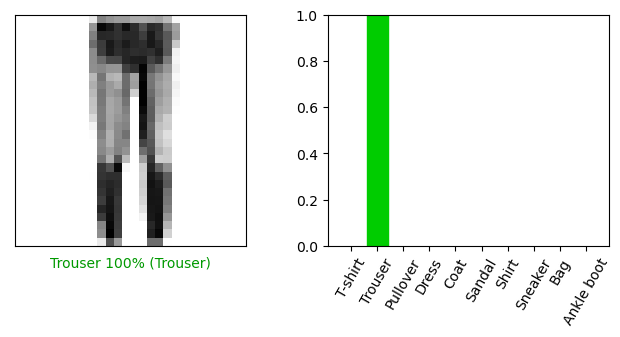

In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = (0,0.6,0)
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color=(0.7,0.7,0.7))  #paint all bars in gray
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red') #over-paint the predicted (i.e. tallest) bar in red
    thisplot[true_label].set_color((0,0.8,0)) #over-paint the bar for the true label in green
    
    
i = 3  #first image

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.xticks(range(10), class_names, rotation=60)
plt.yticks(0.2*np.arange(6))
plt.show()

### Prediction on a single image

In [20]:
img = test_images[6] #select image from the test set
img = np.expand_dims(img,axis=0) #reformat it by adding an extra dimension
probs = mynet.predict(img) #apply model
print('Predicted label:', np.argmax(probs))
print('Item:', class_names[np.argmax(probs)])

1/1 [==============================] - 0s 51ms/step
Predicted label: 4
Item: Coat


### Prediction on a set 16 images:

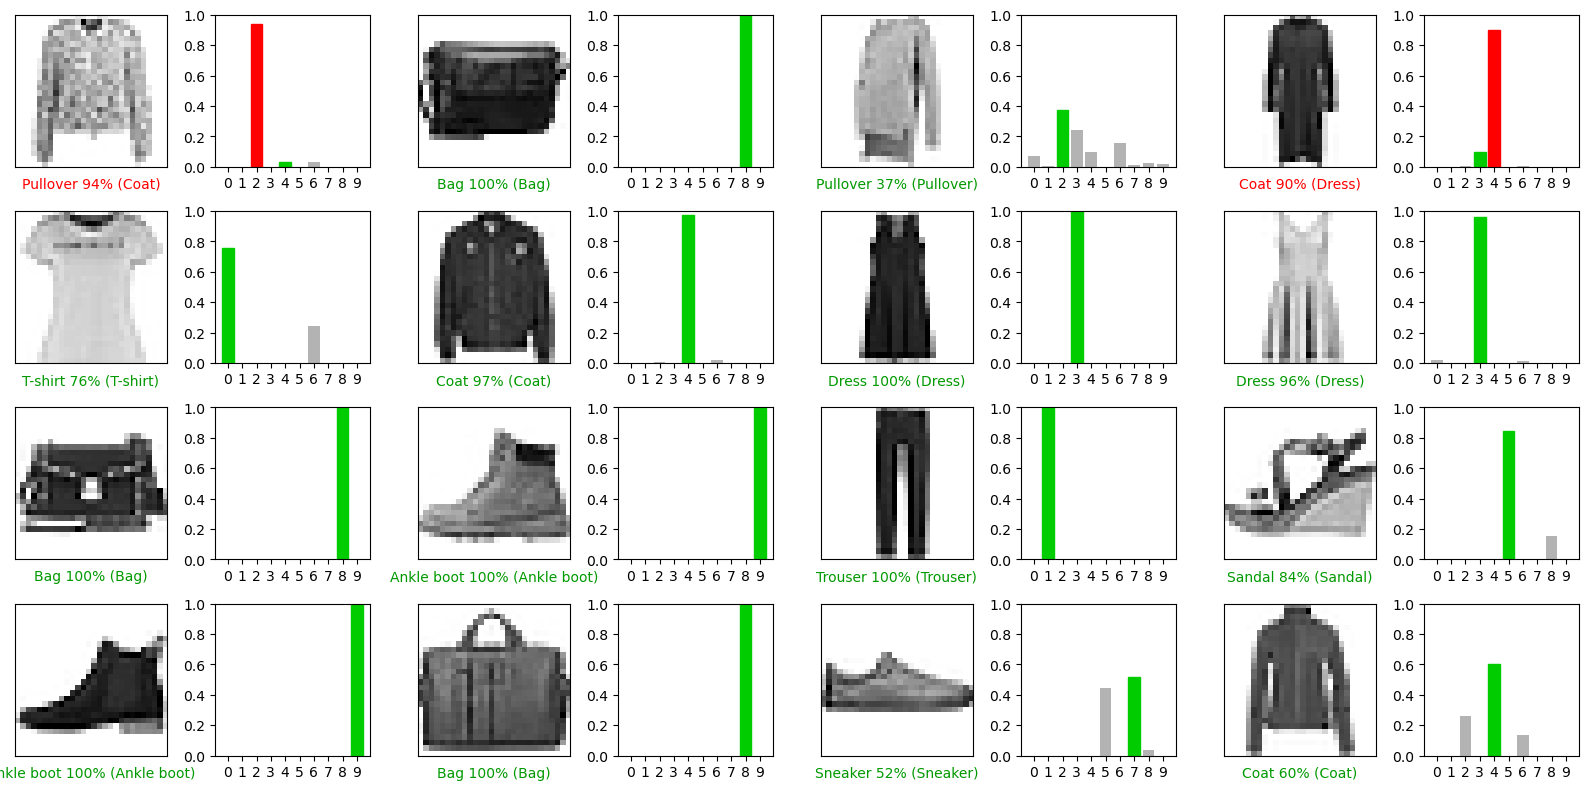

In [21]:
#list of indices of 12 selected images to plot
li = [51, 56, 66, 67, 71, 79, 86, 91, 95, 203, 214, 221, 123, 81, 12, 1234] 

num_rows, num_cols = 4, 4    #want to make 4 by 3 subplots
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(len(li)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(li[i], prediction[li[i]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(li[i], prediction[li[i]], test_labels)
    plt.yticks(0.2*np.arange(6))
plt.tight_layout()
plt.show()